In [1]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [2]:
# Import data and create dataframe
map_data = "joint_data_12_to_16.csv"
map_data_df = pd.read_csv(map_data, encoding="utf-8")
map_data_df

,Year,State,Median Income,Number Employed,Number Unemployed,Number Poverty,Number Families in Poverty,Median Age,Population,Pop: White Only,...,ICPSR State Code,Alphanumeric State Code,Abbrv,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted (Estimate),Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP)
0,2016,Idaho,"$51,807.00",762788,37503,237445,41274,36.1,1683140,1510119,...,63,13,ID,0.609,0.592,0.550,710545.0,690255.0,1166706,1253925
1,2016,Florida,"$50,860.00",9219488,585900,2973512,509616,42.1,20612439,15574165,...,43,10,FL,0.656,0.645,0.569,9580489.0,9420039.0,14601066,16565588
2,2016,Georgia,"$53,559.00",4735947,300529,1603013,296261,36.5,10310371,6054861,...,44,11,GA,0.598,0.591,0.526,4165405.0,4114732.0,6959963,7828207
3,2016,Hawaii,"$74,511.00",686487,31796,129569,18826,38.9,1428557,357994,...,82,12,HI,0.432,0.423,0.383,437664.0,428937.0,1012860,1120465
4,2016,Illinois,"$60,960.00",6231419,419099,1621508,293044,37.9,12801539,9123763,...,21,14,IL,0.631,0.622,0.567,5666118.0,5589631.0,8985443,9866799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,2012,Washington,"$57,573.00",3204090,306984,915278,156411,37.5,6897012,5402912,...,73,48,WA,0.658,0.648,0.586,3172939.0,3125516.0,4822060,5329782
130,2012,Wyoming,"$54,901.00",288852,17113,71019,12425,36.9,576412,523798,...,68,51,WY,0.590,0.586,0.564,250701.0,249061.0,425142,441726
131,2012,Alaska,"$67,712.00",351496,29864,72400,12542,33.8,731449,486551,...,81,2,AK,0.589,0.587,0.553,301694.0,300495.0,511792,543763
132,2012,Arizona,"$47,826.00",2757652,300531,1194506,212634,36.6,6553255,5164199,...,61,3,AZ,0.530,0.526,0.465,2323579.0,2306559.0,4387900,4959270


In [12]:
# Filter down to just the needed data for 2016
map_data_counts_df = pd.DataFrame(map_data_df[["Year", "Abbrv", "Population", "Median Age", "Voting-Eligible Population (VEP)", "VEP Total Ballots Counted"]])
map_data_2016_df = map_data_counts_df.loc[(map_data_counts_df["Year"] == 2016) & (map_data_counts_df["Abbrv"] != "US")]
#map_data_2016_df["VEP Total Ballots Counted"].mean()
map_data_2016_df.head()

,Year,Abbrv,Population,Median Age,Voting-Eligible Population (VEP),VEP Total Ballots Counted
0,2016,ID,1683140,36.1,1166706,0.609
1,2016,FL,20612439,42.1,14601066,0.656
2,2016,GA,10310371,36.5,6959963,0.598
3,2016,HI,1428557,38.9,1012860,0.432
4,2016,IL,12801539,37.9,8985443,0.631


In [25]:
# Create US map based on VEP Ballots
fig = go.Figure(data=go.Choropleth(
    locations=map_data_2016_df['Abbrv'], # Spatial coordinates
    z = map_data_2016_df['VEP Total Ballots Counted'].astype(float)*100, # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_ticksuffix = '%',
    colorbar_title = "Ballot Count (%)",
))

fig.update_layout(
    title_text = '2016 Voting Eligible Population Ballot Counts by State*',
    geo_scope='usa', # limite map scope to USA
    annotations = [dict(
        x=0.1,
        y=-0.15,
        xref='paper',
        yref='paper',
        text='*(EXCLUDES: Mississippi, Oklahoma, Virginia, West Virginia, Pennsylvania, Wisconsin)',
        showarrow = False
    )]
)

# Save the image as a png file and show the image
fig.write_image("Visualizations/us_ballot_counts.png")
fig.show()
avg_us_ballots = map_data_2016_df["VEP Total Ballots Counted"].mean()
print(f"The average VEP US ballot count is {avg_us_ballots:.1%}")

The average VEP US ballot count is 61.9%


In [22]:
# Create US map based on Population
fig2 = go.Figure(data=go.Choropleth(
    locations=map_data_2016_df['Abbrv'], # Spatial coordinates
    z = map_data_2016_df['Population'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    #colorbar_ticksuffix = '%',
    colorbar_title = "Population<br>(in Millions)",
))

fig2.update_layout(
    title_text = '2016 Population Counts by State*',
    geo_scope='usa', # limite map scope to USA
        annotations = [dict(
        x=0.1,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='*(EXCLUDES: Mississippi, Oklahoma, Virginia, West Virginia, Pennsylvania, Wisconsin)',
        showarrow = False
    )]
)

# Save the image as a png file and show the image
fig2.write_image("Visualizations/us_population.png")
fig2.show()
avg_US_pop = map_data_2016_df["Population"].mean()
print(f"The average US population is {avg_US_pop:,.0f}")

The average US population is 6,386,875


In [27]:
# Create US map based on Median Age
fig3 = go.Figure(data=go.Choropleth(
    locations=map_data_2016_df['Abbrv'], # Spatial coordinates
    z = map_data_2016_df['Median Age'],#.astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Purples',
    #colorbar_ticksuffix = '%',
    colorbar_title = "Median Age<br>(Years)",
))

fig3.update_layout(
    title_text = '2016 Median Age by State*',
    geo_scope='usa', # limite map scope to USA
        annotations = [dict(
        x=0.1,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='*(EXCLUDES: Mississippi, Oklahoma, Virginia, West Virginia, Pennsylvania, Wisconsin)',
        showarrow = False
    )]
)
# Save the image as a png file and show the image
fig3.write_image("Visualizations/us_age.png")
fig3.show()
avg_US_age = map_data_2016_df["Median Age"].mean()
print(f"The average US age is {avg_US_age:,.1f}")

The average US age is 38.1


In [7]:
# Import data for just Oregon and create dataframe
voter_data = "voter_data.csv"
voter_data_df = pd.read_csv(voter_data, encoding="utf-8")

# Remove unnecessary columns and filter to just return Oregon data
or_data_df = pd.DataFrame(voter_data_df[["Year", "Abbrv", "Total Ballots Counted (Estimate)", "Voting-Eligible Population (VEP)"]])
or_only_data_df = or_data_df.loc[(or_data_df["Abbrv"] == "OR")].reset_index(drop=True)
or_only_data_df

,Year,Abbrv,Total Ballots Counted (Estimate),Voting-Eligible Population (VEP)
0,2016,OR,2056310.0,3024174
1,2014,OR,1541782.0,2887517
2,2012,OR,1820507.0,2836101
3,2010,OR,1487210.0,2760607
4,2008,OR,1845251.0,2700327
5,2006,OR,1399650.0,2628937
6,2004,OR,1851671.0,2550887
7,2002,OR,1293756.0,2495739
8,2000,OR,1559215.0,2364402
9,1998,OR,1160400.0,2370381


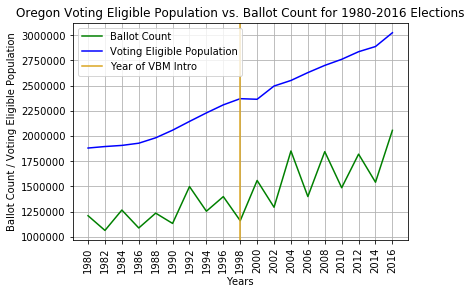

In [51]:
# Plot the data in a line plot
# Create a list of the years to use as the x-axis
years = or_only_data_df["Year"]

# Create a list of ballot counts and voting eligible population for the y-axis
ballot_count = or_only_data_df["Total Ballots Counted (Estimate)"]
population = or_only_data_df["Voting-Eligible Population (VEP)"]

# Plot the line that will be used to track OR Ballot Counts over the years
plt.plot(years, ballot_count, color="green", label="Ballot Count")

# Plot the line that will be used to track OR Voting Eligible Population over the years
plt.plot(years, population, color="blue", label="Eligible Voting Population")

### Place a legend on the chart in what matplotlib believes to be the "best" location
##plt.legend(["Years","Ballot Count/Voting Eligible Population", "Year of VBM Intro"],loc="best")

plt.title("Oregon Voting Eligible Population vs. Ballot Count for 1980-2016 Elections")
plt.xticks(years, rotation=90)
plt.xlabel("Years")
plt.ylabel("Ballot Count / Voting Eligible Population")

# Add vertical line to mark when VBM went into affect
plt.axvline(x=1998,c="goldenrod")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(["Ballot Count", "Voting Eligible Population","Year of VBM Intro"],loc="best")

plt.grid()

# Print the chart to the screen
#plt.savefig("Visualizations/or_ballot_counts.png")
plt.show()